# Analysis of pilot data 

## 1. Load the dataset
### Notation
- If Group == 1, questions with digit 7 have a win/loss payoff of +- 1 cent, and questions with digit 0 have a win/loss payoff of +- 10 cents.
- If Group == 2, questions with digit 0 have a win/loss payoff of +- 1 cent, and questions with digit 7 have a win/loss payoff of +- 10 cents.
- Q_what_comes_to_mind: which digit participants indicated to the question "name the first digit that comes to your mind"

##### To find all titles of the questions, see pilot_full_data.csv

In [21]:
import pandas as pd

data = pd.read_csv('pilot_data/pilot_jun26/pilot_edited_data.csv')
print(data.head())

       StartDate        EndDate  Duration  Finished   RecordedDate  Q1  \
0  6/26/24 11:03  6/26/24 11:17       818         1  6/26/24 11:17   1   
1  6/26/24 11:08  6/26/24 11:21       757         1  6/26/24 11:21   1   
2  6/26/24 11:08  6/26/24 11:22       842         1  6/26/24 11:22   1   
3  6/26/24 11:04  6/26/24 11:23      1124         1  6/26/24 11:23   1   
4  6/26/24 11:10  6/26/24 11:25       890         1  6/26/24 11:25   1   

   Timer_First Click  Timer_Last Click  Timer_Page Submit  Timer_Click Count  \
0              0.000             0.000             22.301                  0   
1              0.000             0.000             41.843                  0   
2              0.000             0.000             22.339                  0   
3             39.521            39.521            120.521                  1   
4              5.171            19.658             26.336                  4   

   ...  Q0_9_1  Q110_First Click  Q110_Last Click  Q110_Page Submit  \
0  

## Digit that comes to mind, per group

In [22]:
# Classify the responses
def classify_digit(value):
    if value == 0:
        return '0'
    elif value == 7:
        return '7'
    else:
        return 'other'

data['Classified_Response'] = data['Q_what_comes_to_mind'].apply(classify_digit)

# Group by 'Group' and 'Classified_Response' and count frequencies
grouped_counts = data.groupby(['Group', 'Classified_Response']).size().unstack(fill_value=0)

# Get unique groups
groups = data['Group'].unique()

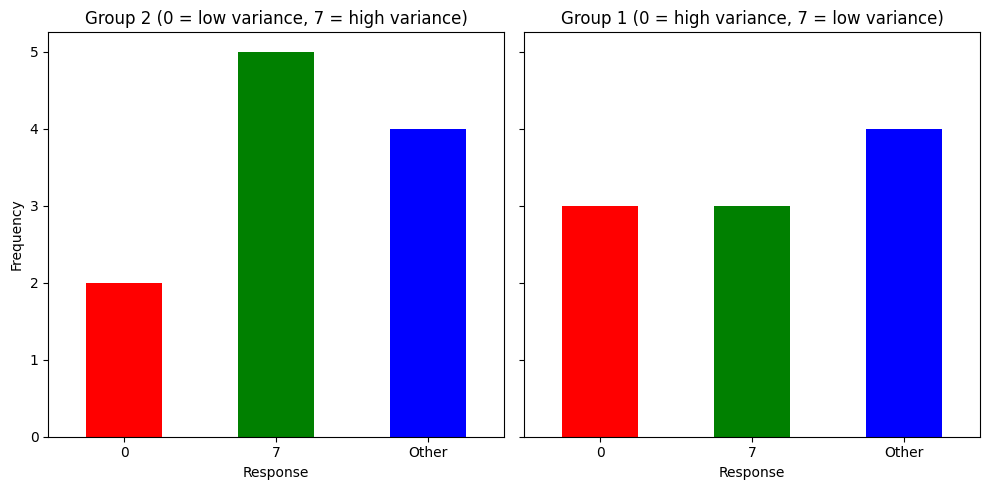

In [23]:
# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=1, ncols=len(groups), figsize=(10, 5), sharey=True)

# Titles for each group
titles = {
    1: "Group 1 (0 = high variance, 7 = low variance)",
    2: "Group 2 (0 = low variance, 7 = high variance)"
}

# Plot each group's data
for i, group in enumerate(groups):
    grouped_counts.loc[group].plot(kind='bar', ax=axes[i], color=['red', 'green', 'blue'])
    axes[i].set_title(titles[group])
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticklabels(['0', '7', 'Other'], rotation=0)

plt.tight_layout()
plt.show()

## Number of players with perfect score (710 cents)

In [19]:
# Count the number of players with a totalPayoff of 710
count_payoff_710 = (data['totalPayoff'] == 710).sum()

# Calculate the total number of players
total_players = len(data)

# Calculate the fraction of players with a totalPayoff of 710
fraction_payoff_710 = count_payoff_710 / total_players

# Print the results
print(f"Number of players with a totalPayoff of 710: {count_payoff_710}")
print(f"Fraction of players with a totalPayoff of 710: {fraction_payoff_710:.2f}")


Number of players with a totalPayoff of 710: 6
Fraction of players with a totalPayoff of 710: 0.29
